In [2]:
%matplotlib inline

import os
import sys

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt

In [179]:
# Git: b60a76d

# There is something wrong with the fluxes computed.
# Transmittance, fluxes inside and just outside irflux() are examined.
# `bu` and `bd` (layer emission) inside irflux() are examined.

# These show that the bug happens when constructin fluxes from 
# `bu`, `bd`  and transmittance.

In [9]:
dir_run = os.path.join('/nuwa_cluster/home/jackyu',
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'lblnew_20160916_tmp')

path_meank = os.path.join(dir_run, 'absmean.dat')
path_gk = os.path.join(dir_run, 'gk.dat')

path_trang = os.path.join(dir_run, 'trang.dat')
path_trang_in = os.path.join(dir_run, 'trang_in_irflux.dat')
path_fluxg = os.path.join(dir_run, 'fluxg.dat')
path_fluxg_in = os.path.join(dir_run, 'fluxg_in_irflux.dat')

path_bubd = os.path.join(dir_run, 'bubd.dat')

In [4]:
DICT_FORT = {'flug': 23,
             'fldg': 24, 
             'fnetg': 22,
             'coolrg': 25,
             'sfu': 27,
             'sfd': 26,
             'fnet': 28, 
             'coolr': 29}

In [5]:
# for loading `fnetg`

path_fnetg = os.path.join(dir_run, 'fort.{fnetg:d}'.format(**DICT_FORT))
df = pd.read_csv(path_fnetg, header=None)

n_layer, n_ggroup = 75, 4

n_level = n_layer + 1
df = pd.DataFrame(df.values.reshape(n_ggroup, n_level).transpose())
df.index = range(1, n_level + 1)
df.index.names = ['level']
df.columns = range(1, n_ggroup + 1)
df.columns.names = ['ggroup']

In [116]:
# for loading `gk`
df = pd.read_csv(path_gk, sep=r'\s+', index_col=list(range(2)))
srs = df.stack()
srs.index = srs.index.droplevel(2)
da_gk = xr.DataArray.from_series(srs)

In [6]:
#### load transmittance

In [127]:
# for loading trang.dat
df = pd.read_csv(path_trang, sep=r'\s+', index_col=list(range(4)))
srs = df.stack()
srs.index = srs.index.droplevel(4)
da_trang = xr.DataArray.from_series(srs)

In [133]:
# for loading trang_in_irflux.dat
df = pd.read_csv(path_trang_in, sep=r'\s+', index_col=list(range(4)))
srs = df.stack()
srs.index = srs.index.droplevel(4)
da_trang_in = xr.DataArray.from_series(srs)

In [7]:
#### load flux

In [144]:
# for loading fluxg.dat --- `flu`, `fld`
df = pd.read_csv(path_fluxg, sep=r'\s+', index_col=list(range(3)))
ds_fluxg = xr.Dataset.from_dataframe(df)

In [152]:
# for loading fluxg_in_irflux.dat --- `flu`, `fld`
df = pd.read_csv(path_fluxg_in, sep=r'\s+', index_col=list(range(3)))
ds_fluxg_in = xr.Dataset.from_dataframe(df)

In [155]:
#### load bu bd
df = pd.read_csv(path_bubd, sep=r'\s+', index_col=list(range(3)))
ds_bubd = xr.Dataset.from_dataframe(df)

In [76]:
da_gk.sel(iband=1, ig=2)

<xarray.DataArray ()>
array(0.0)
Coordinates:
    iband    int64 1
    ig       int64 2

/nuwa_cluster/home/jackyu/locally_installed_python_pacakges/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


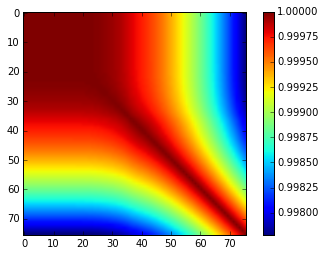

In [27]:
plt.imshow(da_trang_in.sel(iband=1, ig=1))
plt.colorbar()

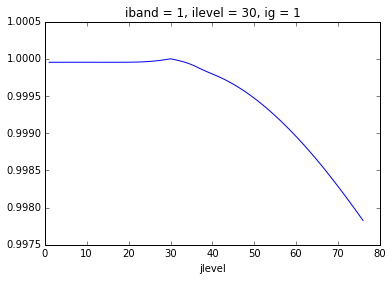

In [32]:
da_trang.sel(iband=1, ig=1, ilevel=30).plot()

In [147]:
# transmittance is positive definite
(da_trang >= 0).all()

<xarray.DataArray ()>
array(True, dtype=bool)

In [148]:
# transmittance ranges between 0 and 1
da_trang.to_series().describe()

count    3812160.000000
mean           0.404597
std            0.453913
min            0.000000
25%            0.000000
50%            0.000000
75%            0.967296
max            1.000000
dtype: float64

In [9]:
# look at downward flux computed when gk(ig, iband) != 0
# iband=2, ig=1 shows a problematic jump at the bottom level
ds_fluxg['fld'].where(da_gk != 0.).sel(iband=2, ig=1)

<xarray.DataArray (ilevel: 76)>
array([  0.00000000e+00,   2.01070000e-04,   2.62190000e-04,
         3.51040000e-04,   3.63290000e-04,   3.69930000e-04,
         3.76590000e-04,   3.83340000e-04,   3.90200000e-04,
         3.97140000e-04,   4.04140000e-04,   4.11340000e-04,
         4.24610000e-04,   6.38610000e-04,   1.67867000e-03,
         3.88065000e-03,   6.40330000e-03,   8.42802000e-03,
         1.02713500e-02,   1.23726400e-02,   1.47790200e-02,
         1.65000400e-02,   1.34170600e-02,   4.20280000e-03,
        -1.05446500e-02,  -1.38990500e-02,  -1.34824400e-02,
        -1.17371000e-02,  -9.78289000e-03,  -8.08843000e-03,
        -6.83952000e-03,  -5.69799000e-03,  -4.33571000e-03,
        -3.08597000e-03,  -2.36586000e-03,  -1.81811000e-03,
        -9.52530000e-04,  -2.16190000e-04,   1.43910000e-04,
         8.38710000e-04,   2.27068000e-03,   3.69838000e-03,
         4.41874000e-03,   4.64466000e-03,   4.75782000e-03,
         4.84862000e-03,   4.92418000e-03,   4.984770

/nuwa_cluster/home/jackyu/locally_installed_python_pacakges/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


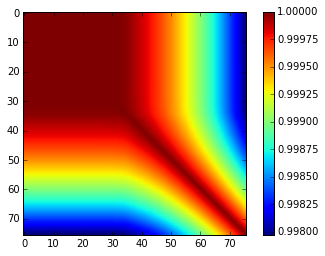

In [150]:
# transmittance at this iband and ig looks ok
plt.imshow(da_trang.sel(iband=2, ig=1))
plt.colorbar()

In [152]:
# transmittance between the bottom level and the others
# at this iband and ig
da_trang.sel(iband=1, ig=1, ilevel=76)

<xarray.DataArray (jlevel: 76)>
array([ 0.99778115,  0.99778115,  0.99778115,  0.99778115,  0.99778115,
        0.99778115,  0.99778115,  0.99778116,  0.99778116,  0.99778117,
        0.99778118,  0.99778119,  0.99778121,  0.99778123,  0.99778127,
        0.99778133,  0.99778141,  0.99778156,  0.9977818 ,  0.99778221,
        0.99778287,  0.99778394,  0.99778567,  0.99778834,  0.99779206,
        0.99779676,  0.99780248,  0.99780932,  0.99781738,  0.9978268 ,
        0.99783776,  0.99785044,  0.99786511,  0.99788238,  0.99790298,
        0.99792746,  0.99795541,  0.99798074,  0.99800497,  0.99802867,
        0.9980524 ,  0.99807727,  0.99810419,  0.99813329,  0.99816455,
        0.99819794,  0.9982334 ,  0.99827092,  0.99831046,  0.99835197,
        0.99839542,  0.99844074,  0.99848789,  0.99853683,  0.99858749,
        0.99863985,  0.99869387,  0.99874954,  0.99880682,  0.99886569,
        0.99892615,  0.99898817,  0.99905171,  0.99911678,  0.99918334,
        0.99925139,  0.9993209 ,

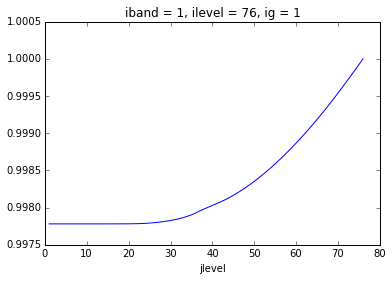

In [153]:
# there is no discontinuity
da_trang.sel(iband=1, ig=1, ilevel=76).plot()

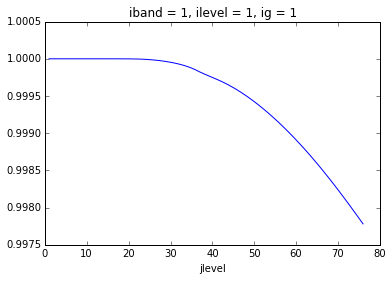

In [5]:
da_trang.sel(iband=1, ig=1, ilevel=1).plot()

In [177]:
### pandas and xray 

# pd.MultiIndex.labels does not have to exhaust all possible combinations
# of pd.MultiIndex.levels

# In converting a pd.DataFrame or pd.Series with pd.MultiIndex to 
# xarray data types, xarray will fill in those missing combinations
# with `nan`. 

# This is demonstrated here below:

In [106]:
multiindex = pd.MultiIndex.from_product([range(1, 10 + 1), range(1, 4 + 1)])

In [162]:
srs = pd.Series(np.arange(40) + 5.6, index=multiindex)

In [163]:
srs = srs.drop((1, 2), axis=0)
srs = srs.drop((3, 2), axis=0)

In [166]:
len(srs.index.values)

38

In [169]:
da = xr.DataArray.from_series(srs)

In [178]:
da

<xarray.DataArray (level_0: 10, level_1: 4)>
array([[  5.6,   nan,   7.6,   8.6],
       [  9.6,  10.6,  11.6,  12.6],
       [ 13.6,   nan,  15.6,  16.6],
       [ 17.6,  18.6,  19.6,  20.6],
       [ 21.6,  22.6,  23.6,  24.6],
       [ 25.6,  26.6,  27.6,  28.6],
       [ 29.6,  30.6,  31.6,  32.6],
       [ 33.6,  34.6,  35.6,  36.6],
       [ 37.6,  38.6,  39.6,  40.6],
       [ 41.6,  42.6,  43.6,  44.6]])
Coordinates:
  * level_0  (level_0) int64 1 2 3 4 5 6 7 8 9 10
  * level_1  (level_1) int64 1 2 3 4